In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d chetankv/dogs-cats-images
!unzip -q dogs-cats-images.zip

100% 433M/435M [00:21<00:00, 23.9MB/s]
100% 435M/435M [00:21<00:00, 21.5MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, each with a 3x3 kernel, 
# ReLU activation function, and input shape of 150x150 pixels with 3 channels
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Add a max pooling layer with a 2x2 pool size to reduce the spatial size of the feature maps
model.add(MaxPooling2D((2, 2)))

# Add a dropout layer to randomly drop 25% of the nodes in the layer to prevent overfitting
model.add(Dropout(0.25))

# Add a convolutional layer with 64 filters, each with a 3x3 kernel and ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Add a convolutional layer with 128 filters, each with a 3x3 kernel and ReLU activation function
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the previous layer to a 1D array
model.add(Flatten())

# Add a dense layer with 128 nodes and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a dense layer with 1 node and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))


In [19]:
# Compile the model with Adam optimizer, binary crossentropy as the loss function, and accuracy as the metric to evaluate performance
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [20]:
# Create an ImageDataGenerator object to rescale the pixel values of the training set images by a factor of 1/255
train_datagen = ImageDataGenerator(rescale=1./255)

# Use the ImageDataGenerator object to generate a batch of image data from the directory 'dataset/training_set'
# The images are resized to 150x150 pixels and the batch size is set to 32.
# The class_mode is set to 'binary' as the images are classified into two categories
train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Create another ImageDataGenerator object to rescale the pixel values of the validation set images by a factor of 1/255
validation_datagen = ImageDataGenerator(rescale=1./255)

# Use the ImageDataGenerator object to generate a batch of image data from the directory 'dataset/test_set'
# The images are resized to 150x150 pixels and the batch size is set to 32.
# The class_mode is set to 'binary' as the images are classified into two categories
validation_generator = validation_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
# Train the model using the fit_generator method with the ImageDataGenerator objects for the training and validation sets
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.n // train_generator.batch_size, # number of batches per epoch
      epochs=10, # number of training epochs
      validation_data=validation_generator,
      validation_steps=validation_generator.n // validation_generator.batch_size) # number of batches per validation



Epoch 1/10


<ipython-input-21-18e5c015e1d2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


250/250 [==============================] - 39s 150ms/step - loss: 0.7304 - accuracy: 0.5180 - val_loss: 0.6922 - val_accuracy: 0.5131
Epoch 2/10
250/250 [==============================] - 37s 149ms/step - loss: 0.6706 - accuracy: 0.5876 - val_loss: 0.6621 - val_accuracy: 0.6275
Epoch 3/10
250/250 [==============================] - 38s 151ms/step - loss: 0.6314 - accuracy: 0.6550 - val_loss: 0.5928 - val_accuracy: 0.6910
Epoch 4/10
250/250 [==============================] - 34s 135ms/step - loss: 0.5921 - accuracy: 0.6896 - val_loss: 0.5647 - val_accuracy: 0.7011
Epoch 5/10
250/250 [==============================] - 37s 149ms/step - loss: 0.5526 - accuracy: 0.7136 - val_loss: 0.5228 - val_accuracy: 0.7404
Epoch 6/10
250/250 [==============================] - 34s 135ms/step - loss: 0.4864 - accuracy: 0.7676 - val_loss: 0.5283 - val_accuracy: 0.7384
Epoch 7/10
250/250 [==============================] - 38s 150ms/step - loss: 0.4364 - accuracy: 0.7966 - val_loss: 0.4882 - val_accuracy: 0.7

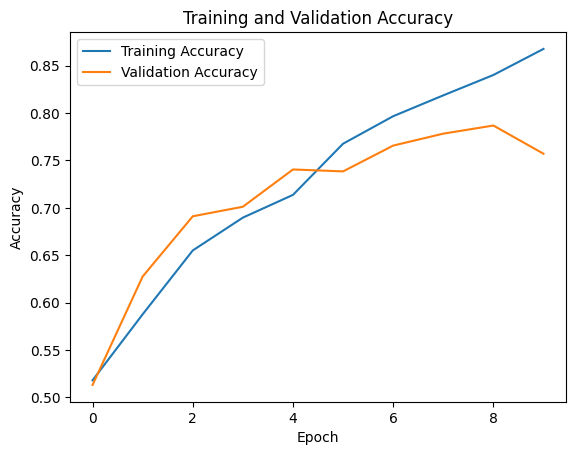

In [22]:
# Import the matplotlib.pyplot library to plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over the number of epochs
plt.plot(history.history['accuracy'], label='Training Accuracy') # plot the training accuracy values
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # plot the validation accuracy values
plt.title('Training and Validation Accuracy') # set the title of the plot
plt.xlabel('Epoch') # set the x-axis label of the plot
plt.ylabel('Accuracy') # set the y-axis label of the plot
plt.legend() # display the legend
plt.show() # display the plot



In [65]:
# Import the necessary libraries
import numpy as np
from PIL import Image

# Define a function to predict the class of an image file
def predict_image(filename):
    # Open the image file and resize it to match the input size of the model
    img = Image.open(filename)
    img = img.resize((150, 150))
    
    # Convert the image to a numpy array and normalize the pixel values to be between 0 and 1
    img_array = np.array(img) / 255.0
    
    # Add an extra dimension to the array to match the expected shape of the input tensor
    img_array = np.expand_dims(img_array, axis=0)
    
    # Use the model to predict the class of the image
    prediction = model.predict(img_array)
    
    # Return the predicted class as a string ('cat' if prediction < 0.5, 'dog' otherwise)
    if prediction <= 0.5:
        return 'cat'
    else:
        return 'dog'



In [66]:
# Define the filename of the image to predict
filename = 'test-image-cat.jpeg'

# Call the predict_image function to make a prediction on the image
prediction = predict_image(filename)

# Print the predicted class of the image
print('Prediction:', prediction)




1/1 [==============================] - 0s 20ms/step
Prediction: cat


In [67]:
# Define the filename of the image to predict
filename = 'test-image-dog.jpeg'

# Call the predict_image function to make a prediction on the image
prediction = predict_image(filename)

# Print the predicted class of the image
print('Prediction:', prediction)

1/1 [==============================] - 0s 25ms/step
Prediction: dog
